### Data Ingestion

Don't forget uv add -r requirements.txt

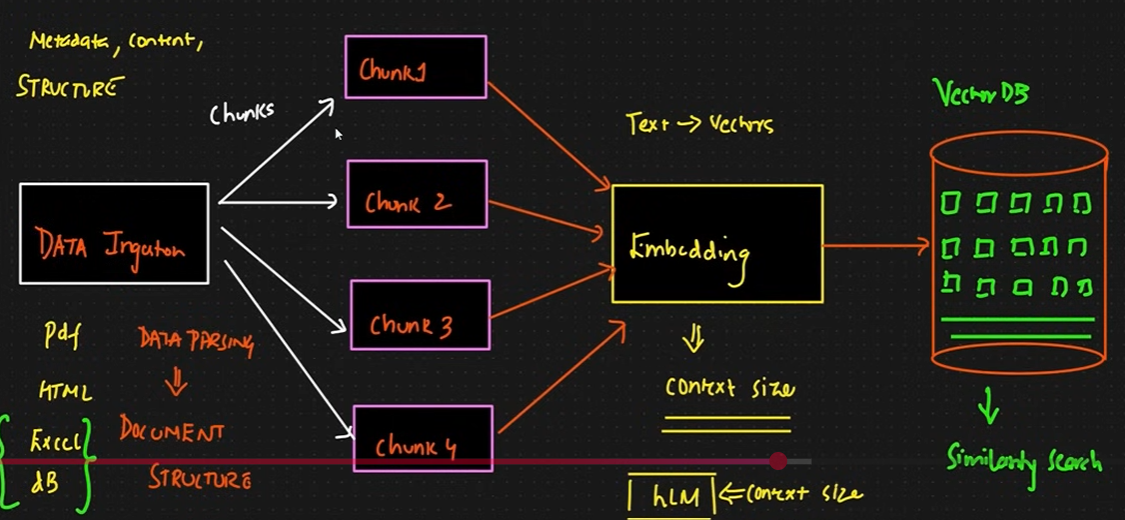

In [1]:
###Document Structure

from langchain_core.documents import Document

In [2]:
doc=Document(
    page_content="this is the main text content I am using to create RAG",
    metadata={
        "source":"exmaple.txt",
        "pages":1,
        "author":"Krish Naik",
        "date_created":"2025-01-01"
    }
)
doc

Document(metadata={'source': 'exmaple.txt', 'pages': 1, 'author': 'Krish Naik', 'date_created': '2025-01-01'}, page_content='this is the main text content I am using to create RAG')

In [3]:
## Create a simple txt file
import os
os.makedirs("../data/text_files",exist_ok=True)

In [4]:
sample_texts={
    "../data/text_files/python_intro.txt":"""Python Programming Introduction

Python is a high-level, interpreted programming language known for its simplicity and readability.
Created by Guido van Rossum and first released in 1991, Python has become one of the most popular
programming languages in the world.

Key Features:
- Easy to learn and use
- Extensive standard library
- Cross-platform compatibility
- Strong community support

Python is widely used in web development, data science, artificial intelligence, and automation.""",
    
    "../data/text_files/machine_learning.txt": """Machine Learning Basics

Machine learning is a subset of artificial intelligence that enables systems to learn and improve
from experience without being explicitly programmed. It focuses on developing computer programs
that can access data and use it to learn for themselves.

Types of Machine Learning:
1. Supervised Learning: Learning with labeled data
2. Unsupervised Learning: Finding patterns in unlabeled data
3. Reinforcement Learning: Learning through rewards and penalties

Applications include image recognition, speech processing, and recommendation systems
    
    
    """

}

for filepath,content in sample_texts.items():
    with open(filepath,'w',encoding="utf-8") as f:
        f.write(content)

print("✅ Sample text files created!")

✅ Sample text files created!


In [5]:
import sys
sys.path

['c:\\Python313\\python313.zip',
 'c:\\Python313\\DLLs',
 'c:\\Python313\\Lib',
 'c:\\Python313',
 '',
 'C:\\Users\\nilad\\AppData\\Roaming\\Python\\Python313\\site-packages',
 'C:\\Users\\nilad\\AppData\\Roaming\\Python\\Python313\\site-packages\\win32',
 'C:\\Users\\nilad\\AppData\\Roaming\\Python\\Python313\\site-packages\\win32\\lib',
 'C:\\Users\\nilad\\AppData\\Roaming\\Python\\Python313\\site-packages\\Pythonwin',
 'c:\\Python313\\Lib\\site-packages']

In [7]:
### TextLoader

from langchain_community.document_loaders import TextLoader

loader=TextLoader("../data/text_files/python_intro.txt",encoding="utf-8")
document=loader.load()
print(document)

C:\Users\nilad\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[Document(metadata={'source': '../data/text_files/python_intro.txt'}, page_content='Python Programming Introduction\n\nPython is a high-level, interpreted programming language known for its simplicity and readability.\nCreated by Guido van Rossum and first released in 1991, Python has become one of the most popular\nprogramming languages in the world.\n\nKey Features:\n- Easy to learn and use\n- Extensive standard library\n- Cross-platform compatibility\n- Strong community support\n\nPython is widely used in web development, data science, artificial intelligence, and automation.')]


In [8]:
### Directory Loader
from langchain_community.document_loaders import DirectoryLoader

## load all the text files from the directory
dir_loader=DirectoryLoader(
    "../data/text_files",
    glob="**/*.txt", ## Pattern to match files  
    loader_cls= TextLoader, ##loader class to use
    loader_kwargs={'encoding': 'utf-8'},
    show_progress=False

)

documents=dir_loader.load()
documents

[Document(metadata={'source': '..\\data\\text_files\\machine_learning.txt'}, page_content='Machine Learning Basics\n\nMachine learning is a subset of artificial intelligence that enables systems to learn and improve\nfrom experience without being explicitly programmed. It focuses on developing computer programs\nthat can access data and use it to learn for themselves.\n\nTypes of Machine Learning:\n1. Supervised Learning: Learning with labeled data\n2. Unsupervised Learning: Finding patterns in unlabeled data\n3. Reinforcement Learning: Learning through rewards and penalties\n\nApplications include image recognition, speech processing, and recommendation systems\n\n\n    '),
 Document(metadata={'source': '..\\data\\text_files\\python_intro.txt'}, page_content='Python Programming Introduction\n\nPython is a high-level, interpreted programming language known for its simplicity and readability.\nCreated by Guido van Rossum and first released in 1991, Python has become one of the most popu

In [9]:
from langchain_community.document_loaders import PyPDFLoader, PyMuPDFLoader

## load all the text files from the directory
dir_loader=DirectoryLoader(
    "../data/pdf_files",
    glob="**/*.pdf", ## Pattern to match files  
    loader_cls= PyMuPDFLoader, ##loader class to use
    show_progress=False

)

pdf_documents=dir_loader.load()
pdf_documents

[Document(metadata={'producer': 'Adobe PDF Library 17.0; modified using iText 4.2.0 by 1T3XT', 'creator': 'Adobe InDesign 19.5 (Windows)', 'creationdate': '2025-10-24T19:40:28+08:00', 'source': '..\\data\\pdf_files\\science.adw1291.pdf', 'file_path': '..\\data\\pdf_files\\science.adw1291.pdf', 'total_pages': 4, 'format': 'PDF 1.3', 'title': 'Improving cosmological reach of a gravitational wave observatory using Deep Loop Shaping', 'author': '', 'subject': 'Science 2025.389:1012-1015', 'keywords': '', 'moddate': '2025-11-30T15:08:48-08:00', 'trapped': '', 'modDate': "D:20251130150848-08'00'", 'creationDate': "D:20251024194028+08'00'", 'page': 0}, page_content='Research ArticleS\nScience\u2003\n4 September 2025\n1012\nASTROPHYSICS\nImproving cosmological reach  \nof a gravitational wave observatory \nusing Deep Loop Shaping\nJonas Buchli1*† Brendan Tracey1†, Tomislav Andric2,3†, \nChristopher Wipf4†, Yu Him Justin Chiu1†, Matthias Lochbrunner1†, \nCraig Donner1†, Rana X. Adhikari4*, Jan 

In [10]:
type(pdf_documents[0])

langchain_core.documents.base.Document

In [11]:
pdf_documents[0].metadata

{'producer': 'Adobe PDF Library 17.0; modified using iText 4.2.0 by 1T3XT',
 'creator': 'Adobe InDesign 19.5 (Windows)',
 'creationdate': '2025-10-24T19:40:28+08:00',
 'source': '..\\data\\pdf_files\\science.adw1291.pdf',
 'file_path': '..\\data\\pdf_files\\science.adw1291.pdf',
 'total_pages': 4,
 'format': 'PDF 1.3',
 'title': 'Improving cosmological reach of a gravitational wave observatory using Deep Loop Shaping',
 'author': '',
 'subject': 'Science 2025.389:1012-1015',
 'keywords': '',
 'moddate': '2025-11-30T15:08:48-08:00',
 'trapped': '',
 'modDate': "D:20251130150848-08'00'",
 'creationDate': "D:20251024194028+08'00'",
 'page': 0}